<b>TP-SVM</b>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svmsource import frontiere, rand_gauss, rand_bi_gauss, plot_2d
import math
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets

from __future__ import division


import matplotlib
matplotlib.use('TkAgg')

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.backends.backend_tkagg import NavigationToolbar2TkAgg
from matplotlib.figure import Figure
from matplotlib.contour import ContourSet

import tkinter as Tk
import sys

from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

c:\program files\python35\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Question 1&2

Question 1:


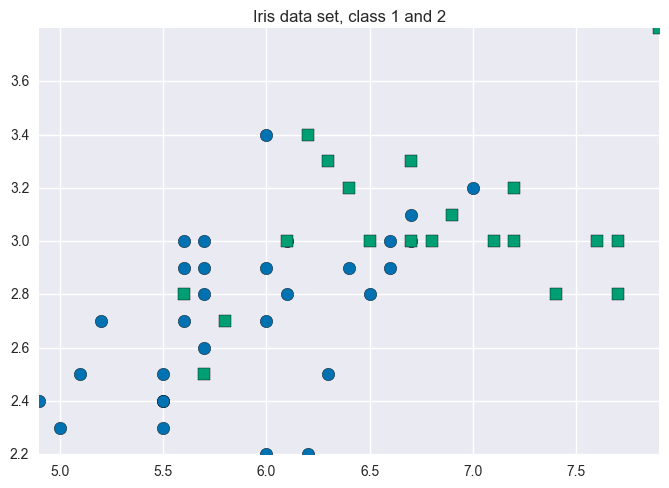

Question 2:
Accuracy of the linear kernel:0.580000
Accuracy of the polynomial kernel:0.600000


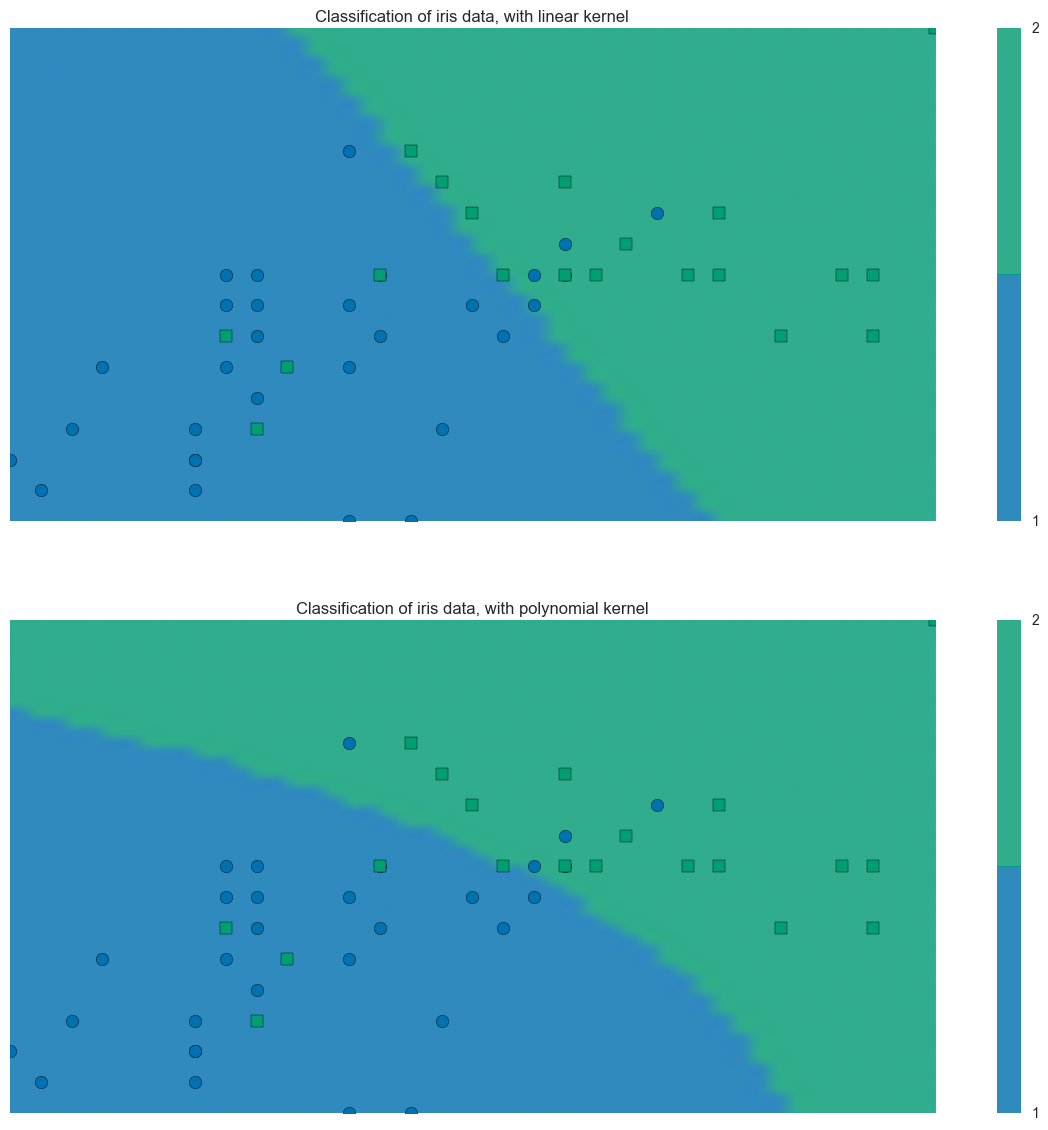

In [11]:
###############################################################################
# Q1： classify iris dataset, linear kernel
###############################################################################

print("Question 1:")

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
[n,p]=X.shape

# split train test
ind=np.random.permutation(n)
X_train=X[ind][0:int(n/2),0:2]
y_train=y[ind][0:int(n/2)]
X_test=X[ind][int(n/2):,0:2]
y_test=y[ind][int(n/2):]

# fit the model
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

# predict labels
y_pred = clf_linear.predict(X_test)



# display your results using plot_2d and frontiere
plt.close("all")
plt.ion()
plt.title('Iris data set, class 1 and 2')
plot_2d(X_train, y_train)
plt.show()

print("Question 2:")

# print the accuracy
print ("Accuracy of the linear kernel:%f" %clf_linear.score(X_test,y_test))

def f1(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_linear.predict(xx.reshape(1, -1))

plt.figure(2, figsize=(16,14))
plt.subplot(211)
plt.title("Classification of iris data, with linear kernel")
frontiere(f1, X_train, y_train, w=None, step=50, alpha_choice=1)

###############################################################################
# Q2: compare with the case by using polynomial kernel
###############################################################################

# fit the model
clf_poly = SVC(kernel='poly')
clf_poly.fit(X_train, y_train)

def f2(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_poly.predict(xx.reshape(1, -1))
# predict labels
y_pred = clf_poly.predict(X_test)

# print the accuracy
print("Accuracy of the polynomial kernel:%f" %clf_poly.score(X_test,y_test))

plt.subplot(212)
plt.title("Classification of iris data, with polynomial kernel")
frontiere(f2, X_train, y_train, w=None, step=50, alpha_choice=1)

<h5>Comparation</h5><br>
<b>noyau linéaire: </b> générer un séparateur de la forme linéaire.  il se comporte bien si les jeu de données sont linéairement séparable.<br>
<b>noyau polynomial: </b> générer un séparateur de la forme polynomiale.

## Question 3

<p>La Question primal s'écrit:</p>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}\xi_i$<br>
$s.c.$<br>
$(1) \forall i = 1,...,n:  y_i(<w, \Phi(x_i)> + w_0) \geq 1-\xi_i$<br>
$(2) \forall i = 1,...,n:  \xi_i \geq 0$
<br><br>

c'est équivalent:<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}\xi_i$<br>
$s.c.$<br>
$(1) \forall i = 1,...,n:  \xi_i \geq 1-y_i(<w, \Phi(x_i)> + w_0)$<br>
$(2) \forall i = 1,...,n:  \xi_i \geq 0$
<br><br>
Donc:<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}\xi_i$<br>
$s.c.$<br>
$\forall i = 1,...,n:  \xi_i \geq max(1-y_i(<w, \Phi(x_i)> + w_0),0)$<br>
<br>
$\xi_i$ sont les distances entre les violateurs et le marge.<br>
$\xi_i=0$ si le point i n'est pas violateur<br>
$\xi_i>0$ si le point i est violateur<br>
<br><br>
Et les $\xi_i$ sont indépendemment constraints, Donc le problème,<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}\xi_i$<br>
$s.c.$<br>
$\forall i = 1,...,n:  \xi_i \geq max(1-y_i(<w, \Phi(x_i)> + w_0),0)$<br>
<br>est équivalent à<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}max(1-y_i(<w, \Phi(x_i)> + w_0),0)$<br>
<br>
$ \Longleftrightarrow  $<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}[1-y_i(<w, \Phi(x_i)> + w_0)]_+$<br>

## Question 4

Expliquez la phrase : "un SVM minimise l’erreur de classification à l’aide d’un majorant convexe
de la fonction qui vaut 1 quand la marge est négative et 0 sinon". 

si $\tilde{y_i}=<w, \Phi(x_i)>+w_0$<br>
alors,<br>
l'erreur 0/1:<br>
$err_{0/1}(\tilde{y_i},y_i) = \mathbb{1}{ [y_i\tilde{y_i} < 0] }$<br>

pour un SVM:<br>
il faut minimiser le nombre de violateurs en minimisant le marge,<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}err_{0/1}(\tilde{y_i},y_i)$<br>
marge:$y_i\tilde{y_i} $<br><br>
Cependant $err_{0/1}(\tilde{y_i},y_i)$ n'est pas convexe<br>
On utilisera Hinge loss: <br>
$ Hinge(y_i,\tilde{y_i}) = max(0,1-y_i\tilde{y_i})$<br>

<br>



on a bien que $y_i=\pm 1$<br>
donc, <br>
(1) quand $y_i \tilde{y_i}\geq 1$, $ Hinge(y_i,\tilde{y_i}) = 0,err_{0/1}(\tilde{y_i},y_i)=0,Hinge=err_{0/1}$<br>
(2) quand $0 \leq y_i \tilde{y_i}< 1$, $ Hinge(y_i,\tilde{y_i}) = 1-y_i\tilde{y_i}\geq 0,err_{0/1}(\tilde{y_i},y_i)=0,Hinge>err_{0/1}$<br>
(3) quand $y_i \tilde{y_i}\leq 0$, $ Hinge(y_i,\tilde{y_i}) = 1-y_i\tilde{y_i}\geq 1,err_{0/1}(\tilde{y_i},y_i)=1,Hinge \geq err_{0/1}$<br>
<br>
Donc $Hinge \geq err_{0/1}$ pour tous  $y_i \tilde{y_i}$<br>
Donc $Hinge(y_i, \tilde{y_i})$ est un majorant de $err_{0/1}(y_i, \tilde{y_i})$, Hinge est aussi convexe.<br>
<br>
Donc,on peut remplacer $err_{0/1}(y_i, \tilde{y_i})$ par $Hinge(y_i, \tilde{y_i})$<br>

$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}Hinge(y_i,\tilde{y_i})$<br>
alors,<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}max(1-y_i\tilde{y_i},0)$<br>


qui revient à la question précédente.<br>
Donc, un SVM minimise l’erreur de classification à l’aide d’un majorant convexe
de la fonction qui vaut 1 quand la marge est négative et 0 sinon.

## SVM GUI

## Question:

A l'aide d’un noyau linéaire et en diminuant le paramètre C, qu'observez vous?

<h5>View de point (1)</h5>
<p>[Answer]<br> En diminuant le paramètre C, de plus en plus de points de la classe minoritaire deviennent mal classés.<br><br></p>
<p>[Explanation]<br>
$\underset{w,b,\xi}{\operatorname{min}}\frac{1}{2}\left\| w \right \|^{2}+C\sum_{i=1}^{n}\xi_i$<br><br>
La première partie de cette fonction objective se concentre sur la maximisation de la marge, tandis que la seconde tente de minimiser le terme de pénalité associé aux erreurs de classement, où le paramètre de régularisation C peut également être considéré comme le coût de classification erroné.<br><br>

Puisque nous considérons le même coût de classification erronée pour tous les exemples de formation (c'est-à-dire la même valeur de C pour la classe majoritaire et la classe minoritaire), afin de réduire la durée de la pénalité, le nombre total de classifications erronées devrait être réduit.<br><br>

Lorsque le jeu de données est déséquilibré, en conséquence, afin de réduire le nombre total de mauvaises classifications dans l'apprentissage SVM, l'hyperplan de séparation peut être déplacé vers la classe minoritaire, ce qui abaisse la performance du modèle sur la classe minoritaire.<br></p>
<h5>View de point (2)</h5>
<p>C is the balance parameter, which controls the weights of 'maximize the gap between two supporting planes' and 'minimize the error of slack variables'<br>
When C decreases, it indicates that we focus more on maximizing the gap, and allow larger error caused by slack variables.<br>
Then we see from the classification result that the gap of supporting planes becomes larger, by ignoring more outliers.<br></p>

## Classification de visages

c:\program files\python35\lib\site-packages\ipykernel\__main__.py:60: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.301s
Chance level : 0.66106442577
Accuracy : 0.91061452514


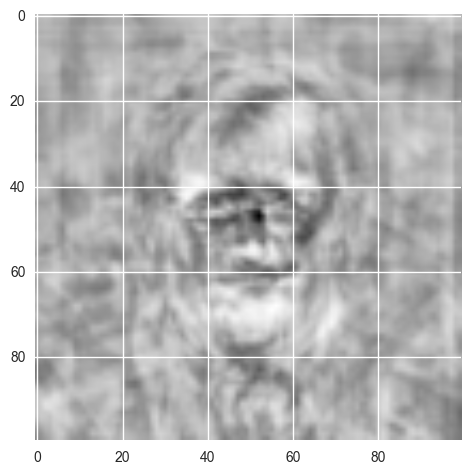

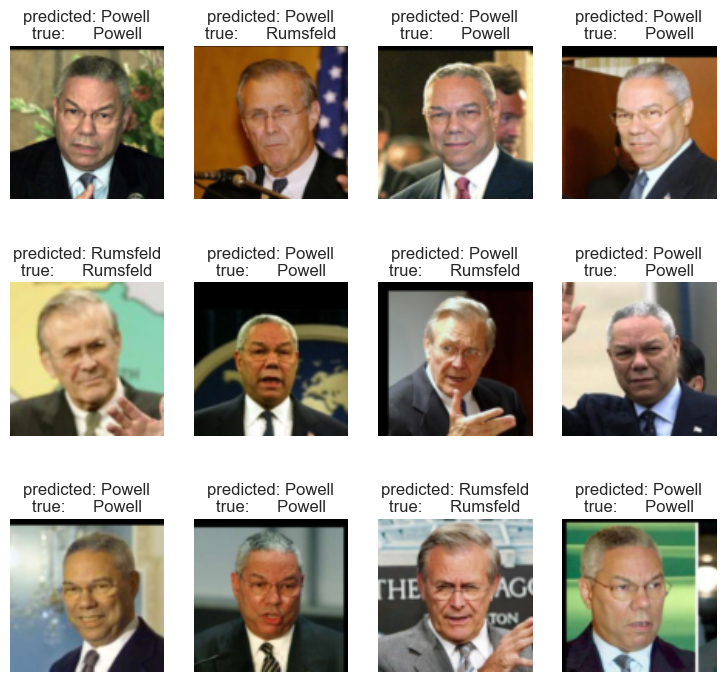

In [7]:
###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=False)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
# names = ['Tony Blair', 'Colin Powell']
names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations只用明度一个特征
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
#X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] / 2], indices[X.shape[0] / 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]


####################################################################
# Quantitative evaluation of the model quality on the test set
print ("Fitting the classifier to the training set")
t0 = time()
#TODO : fit a classifier, 
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print ("Predicting the people names on the testing set")
t0 = time()
# TODO : predict labels for the X_test images
y_pred = clf.predict(X_test)

print ("done in %0.3fs" % (time() - t0))
print ("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print ("Accuracy : %s" % clf.score(X_test, y_test))

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))

####################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()



## Question 5

done in 129.350s


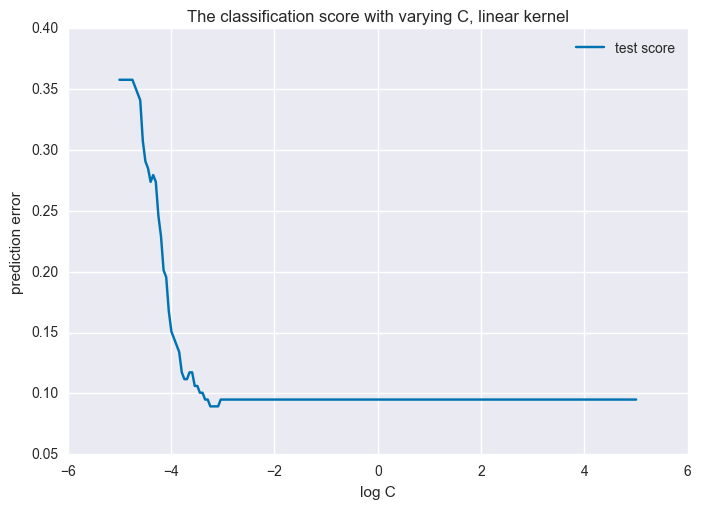

In [349]:
###############################################################################
# QUESTION 5 : try various values for C in the SVC function and plot the error curve
###############################################################################
SCORE_test=[]
#SCORE_train=[]
logC=[]
t0 = time()
c =np.linspace(-5.0,5.0,200)
for i in c:
    clf = SVC(kernel='linear',C=math.pow(10,i))
    clf.fit(X_train, y_train)
    SCORE_test.append(1-clf.score(X_test, y_test))
    #SCORE_train.append(1-clf.score(X_train, y_train))
    logC.append(i)
print ("done in %0.3fs" % (time() - t0))
plt.close('all')
plt.figure(1)
plt.plot(logC,SCORE_test,label='test score')
#plt.plot(logC,SCORE_train,label='train score')
plt.xlabel("log C")
plt.ylabel("prediction error")
plt.legend()
plt.title("The classification score with varying C, linear kernel")
plt.show()

<h5>L'influence du paramètre de régularisation</h5><br>
le paramètre de régularisation C peut également être considéré comme le coût de classification erroné.<br><br>
Le paramètre C indique à l'optimisation SVM combien on veut éviter de mal classer chaque point de "training dataset". <br><br>
<b>[C grande -> overfitting] </b><br>Pour les grandes valeurs de C, l'optimisation choisira un hyperplan de marge plus petite si cet hyperplan fait un meilleur travail pour obtenir tous les points de "training dataset" correctement classés. L'hyperplan sera plus sensible aux 'outliers'.<br><br>
<b>[C petite -> underfitting] </b><br>Inversement, une très petite valeur de C amènera l'optimiseur à rechercher une plus grande marge séparant l'hyperplan, même si cet hyperplan a mal classé plus de points.<br><br>

<h5>Mise en place l'influence</h5><br>
Comme on a vu dans le graph, <br><b>pour le 'test dataset':</b><br>
1) Quand C est entre 1e-5 et 1e-4.1, l'erreur de prédiction descende très vite <br>
<b>  ----underfitting</b><br>
2) Quand C est entre 1e-4.1 et 1e-4.5, le point l'erreur est le plus bas est atteint<br> <b>  ----la meilleure C est entre 1e-4.1 et 1e-4.5</b><br>
3) Quand C est plus grand que le point meilleur, l'erreur  de prédiction remonte un peu et après ne change pas beaucoup <br>
<b>----overfitting</b><br><br>
<b>pour le 'training dataset':</b><br>
Bien sûr que le plus grande C devient, le moins erreur le séparateur fait pour le 'training dataset'.

## Question 6

done in 47.900s


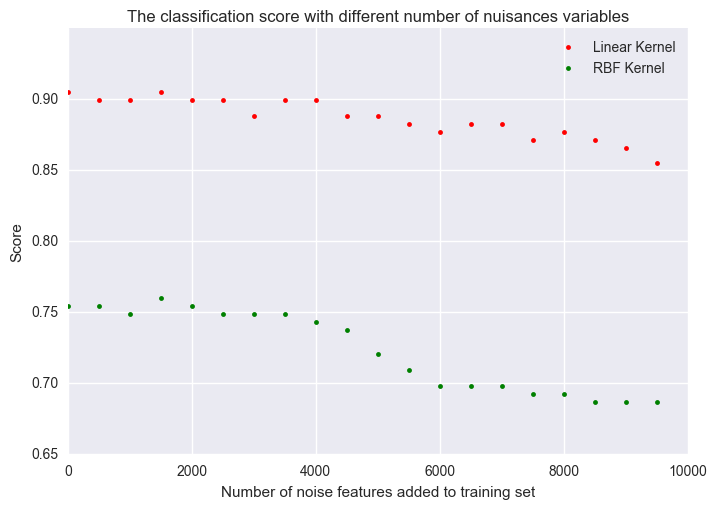

In [351]:
###############################################################################
# QUESTION 6 : en ajoutant des variables de nuisances, montrez que la performance chute
###############################################################################
#noise=np.random.normal(0,1,X_test.shape[0]*10000)
#noise=np.reshape(noise,(X_test.shape[0],10000))
noise_train=np.random.randn(X_train.shape[0],10000)
noise_test=np.random.randn(X_test.shape[0],10000)
SCORE_linear=[]
SCORE_rbf=[]
NOISE=[]
t0 = time()
for i in range(0,10000,500):
    X_train_noise=np.c_[X_train,noise_train[:,0:i]]
    X_test_noise=np.c_[X_test,noise_test[:,0:i]]
    clf1 = SVC(kernel='linear')
    clf2 = SVC(kernel='rbf')
    clf1.fit(X_train_noise, y_train)
    clf2.fit(X_train_noise, y_train)
    SCORE_linear.append(clf1.score(X_test_noise, y_test))
    SCORE_rbf.append(clf2.score(X_test_noise, y_test))
    NOISE.append(i)
print ("done in %0.3fs" % (time() - t0))
plt.figure(2)
plt.plot(NOISE, SCORE_linear,'.',color='red',label='Linear Kernel')
plt.plot(NOISE, SCORE_rbf,'.',color='green',label='RBF Kernel')
plt.xlabel("Number of noise features added to training set")
plt.ylabel("Score")
plt.legend()
plt.title("The classification score with different number of nuisances variables")
plt.show()



<h5>La performance en la presence de bruit</h5><br>
La performance chute en augmantant les bruits, celle du noyau linéaire chute plus lentement que celle du noyau RBF

## Question 7

Expliquez pourquoi les features sont centrées et réduites?

<b>SVM n'est pas invariant de transformation affine.</b> <br>
i.e. Parce que les valeurs du noyau dépendent habituellement des 'inner product' des vecteurs caractéristiques, si vous multipliez une caractéristique par 1000, la solution donnée par SVM sera complètement différente.<br><br>

Toutes les méthodes du noyau sont basées sur la distance dans un espace.<br>

'Scaling' préviens les attributs dans de plus grandes plages numériques de dominent ceux de plus petites gammes numériques. <br>
Un autre avantage est d'éviter des difficultés numériques pendant le calcul.<br>


## Question 8.1

done in 158.125s


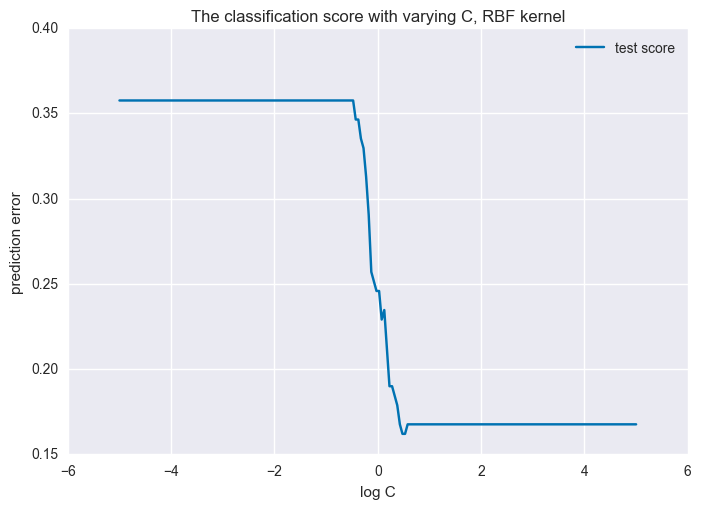

In [352]:
###############################################################################
# QUESTION 8.1 : quel est l’eﬀet du choix d’un noyau non-linéaire RBF sur la prédiction? 
###############################################################################

SCORE_test=[]
#SCORE_train=[]
logC=[]
t0 = time()
c =np.linspace(-5.0,5.0,200)
for i in c:
    clf = SVC(kernel='rbf',C=math.pow(10,i))
    clf.fit(X_train, y_train)
    SCORE_test.append(1-clf.score(X_test, y_test))
    #SCORE_train.append(1-clf.score(X_train, y_train))
    logC.append(i)
print ("done in %0.3fs" % (time() - t0))
plt.close('all')
plt.figure(1)
plt.plot(logC,SCORE_test,label='test score')
#plt.plot(logC,SCORE_train,label='train score')
plt.xlabel("log C")
plt.ylabel("prediction error")
plt.legend()
plt.title("The classification score with varying C, RBF kernel")
plt.show()



<h5>l’effet du choix d’un noyau non-linéaire RBF sur la prédiction</h5><br>
1) RBF se comporte pire que le noyau linéaire lors que le nombre des features est beaucoup plus grand que celui des observations.
Parce que si le nombre de caractéristiques est grand, il n'est pas nécessaire de mapper les données dans un espace de dimension plus grand.<br><br>
2) le noyau linéaire est moins sujet à overfitting que les noyaux non linéaire.<br>-----(puisque la chute arrive quand log(C) est environ 0, mais la chute arrive quand log(C) est environ -4 pour le noyau linéaire.)

## Question 8.2

done in 14.714s


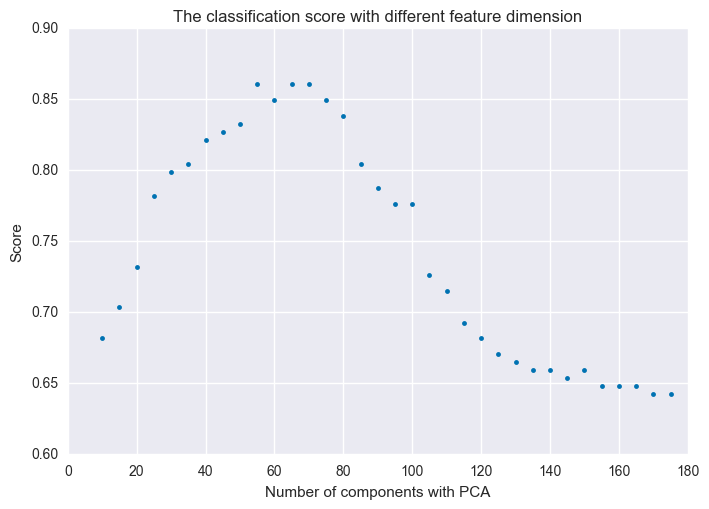

In [353]:
###############################################################################
# QUESTION 8.2 : try reducing the dimension using sklearn.decomposition.RandomizedPCA and compute again an SVM classifer
###############################################################################

SCORE=[]
N_C=[]
t0 = time()
for n in range(10,X_train.shape[0],5):
    pca = PCA( n_components=n, svd_solver='randomized',whiten=True)##problem!
    #print("Extracting the %d features from %d" % (pca.components_[0], X_train.shape[1])," with RandomizedPCA")
    X_train_PCA=pca.fit_transform(X_train)
    X_test_PCA=pca.transform(X_test)
    clf = SVC(kernel='rbf',C=1) 
    clf.fit(X_train_PCA, y_train)
    SCORE.append(clf.score(X_test_PCA, y_test))
    N_C.append(n)
print ("done in %0.3fs" % (time() - t0))
plt.close('all')
plt.figure(4)
plt.plot(N_C,SCORE,'.')
plt.xlabel("Number of components with PCA")
plt.ylabel("Score")
plt.title("The classification score with different feature dimension")
plt.show()

<h5>L'evolution de score en augmentant la dimension de PCA</h5>
le score augmente d'abord en augmentant la dimension, et après le score chute. Le point maximum est atteint entre 60 et 80.

## Calcul du saut de dualité

## Question 9

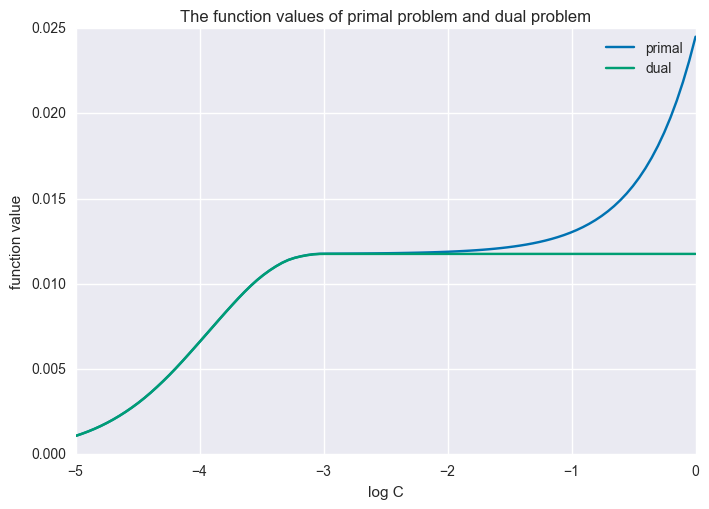

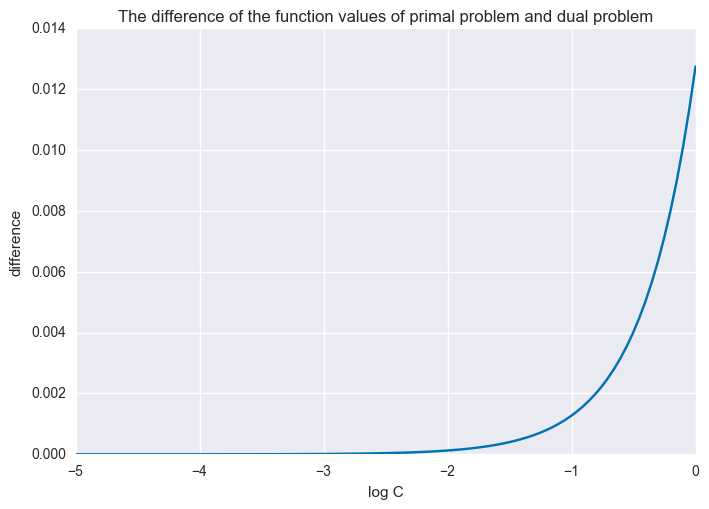

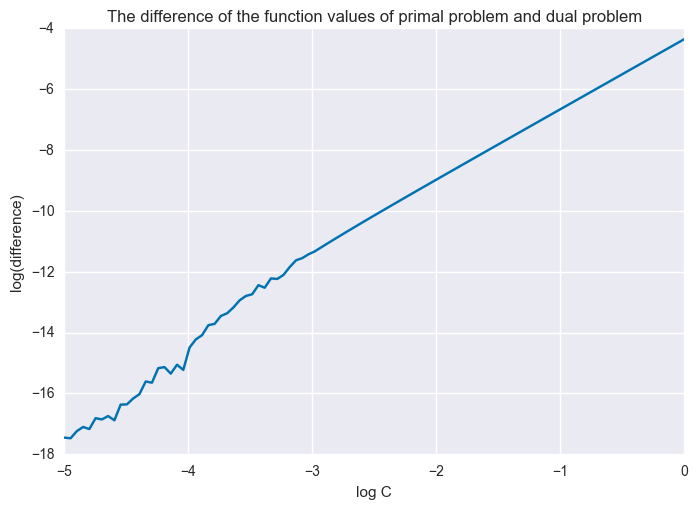

In [355]:
###############################################################################
# QUESTION 9 : 
###############################################################################
value_primal = []
value_dual = []
value_difference = []
value_difference_log = []
logC = []
c =np.linspace(-5.0,0,100)
def primal_dual(C):
    y_train[y_train ==0] = -1
    clf = svm.SVC(kernel='linear',C=C,tol=0.001)
    clf.fit(X_train, y_train)
    # cost1=0.5*np.linalg.norm(clf.coef_[0],2)**2
    hinge=1-y_train*(np.dot(X_train,clf.coef_[0]) + clf.intercept_[0])
    hinge=hinge[hinge>=0]
    hinge
    cost = 0.5*np.linalg.norm(clf.coef_[0],2)**2 + C*sum(hinge)
    cost

    aayyxx=0
    for i in range(len(clf.dual_coef_[0])):
        for j in range(len(clf.dual_coef_[0])):
            aayyxx=aayyxx+clf.dual_coef_[0][i]*clf.dual_coef_[0][j]*np.dot(clf.support_vectors_[i,:] , clf.support_vectors_[j,:])
    dual_cost = np.sum(clf.dual_coef_*y_train[clf.support_]) - 0.5*aayyxx
    return cost,dual_cost

for i in c:
    p,d = primal_dual(10**i)
    value_primal.append(p)
    value_dual.append(d)
    value_difference.append(p-d)
    value_difference_log.append(math.log(p-d))
    logC.append(i)
plt.close('all')
plt.figure(1)
plt.plot(logC,value_primal,label='primal')
plt.plot(logC,value_dual,label='dual')
plt.xlabel("log C")
plt.ylabel("function value")
plt.legend()
plt.title("The function values of primal problem and dual problem")
plt.show()

plt.figure(2)
plt.plot(logC,value_difference)
plt.xlabel("log C")
plt.ylabel("difference")
plt.legend()
plt.title("The difference of the function values of primal problem and dual problem")
plt.show()

plt.figure(3)
plt.plot(logC,value_difference_log)
plt.xlabel("log C")
plt.ylabel("log(difference)")
plt.legend()
plt.title("The difference of the function values of primal problem and dual problem")
plt.show()

<h5>Les observations</h5>
1) La valeur des fonctionnelles primales et duales sont proches. <br>
2) C'est toujours que le min-problème<b>(primal)</b> a une valeur plus grande que le max-problème<b>(dual)</b><br>
2) En augmentant C, la différence entre les deux valeux augmente. Et c'est prèsque une relation <b>linéaire</b> entre <b>log(difference)</b> et <b>log(C)</b>.<br>

## Question 10

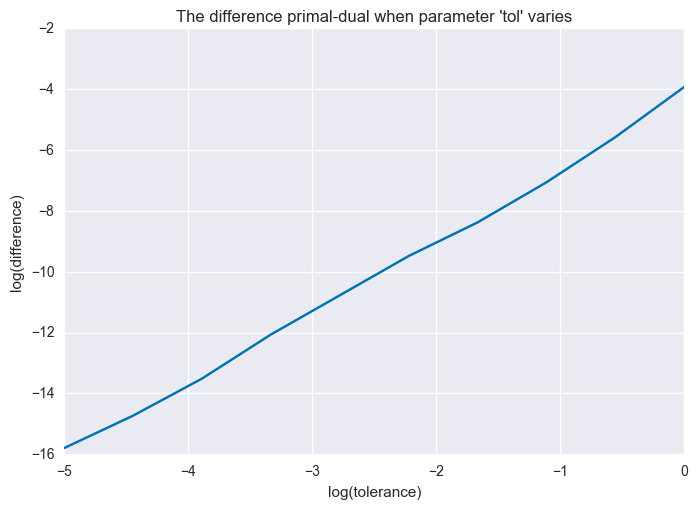

In [356]:
###############################################################################
# QUESTION 10: 
###############################################################################
value_difference = []
tol = []
c =np.linspace(-5.0,0.0,10)
C = 0.001
def primal_dual_tol(t):
    y_train[y_train ==0] = -1
    clf = svm.SVC(kernel='linear',C=C,tol=t)
    clf.fit(X_train, y_train)
    # cost1=0.5*np.linalg.norm(clf.coef_[0],2)**2
    hinge=1-y_train*(np.dot(X_train,clf.coef_[0]) + clf.intercept_[0])
    hinge=hinge[hinge>=0]
    hinge
    cost = 0.5*np.linalg.norm(clf.coef_[0],2)**2 + C*sum(hinge)
    cost

    aayyxx=0
    for i in range(len(clf.dual_coef_[0])):
        for j in range(len(clf.dual_coef_[0])):
            aayyxx=aayyxx+clf.dual_coef_[0][i]*clf.dual_coef_[0][j]*np.dot(clf.support_vectors_[i,:] , clf.support_vectors_[j,:])
    dual_cost = np.sum(clf.dual_coef_*y_train[clf.support_]) - 0.5*aayyxx
    return cost,dual_cost

for i in c:
    p,d = primal_dual_tol(10**i)
    value_difference.append(math.log(p-d))
    tol.append(i)
plt.close('all')
plt.figure(1)
plt.plot(tol,value_difference)
plt.xlabel("log(tolerance)")
plt.ylabel("log(difference)")
plt.legend()
plt.title("The difference primal-dual when parameter 'tol' varies")
plt.show()

<h5>Comment varie la différence entre les deux valeurs quand on fait varier la tolérance sur l’optimisation
(paramètre tol de SVC)?</h5>



En augmentant <b>tol</b>, la différence entre les deux valeux augmente. Et c'est prèsque une relation <b>linéaire</b> entre <b>log(difference)</b> et <b>log(tol)</b>.<br>